In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import and filter metadata

In [2]:
df = pd.read_csv('genome_metadata.tsv', sep='\t')
df

,genome_id,metagenome_id,genome_length,num_contigs,n50,num_16s,num_5s,num_23s,num_trna,completeness,contamination,quality_score,mimag_quality,otu_id,ecosystem,ecosystem_category,ecosystem_type,habitat,longitude,latitude
0,3300025516_6,3300025516,2910752,137,34707,1.0,1.0,1.0,43.0,90.42,0.65,87.17,HQ,OTU-1761,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
1,3300025516_8,3300025516,2473071,426,6047,1.0,0.0,0.0,37.0,65.97,2.52,53.37,MQ,OTU-11015,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
2,3300025516_7,3300025516,2626327,104,45304,1.0,1.0,0.0,48.0,94.49,1.13,88.84,MQ,OTU-1762,d__Bacteria;p__Firmicutes_D;c__UBA994;o__UBA99...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
3,3300025516_3,3300025516,3300395,411,9060,0.0,0.0,0.0,31.0,79.36,4.74,55.66,MQ,OTU-8708,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
4,3300025516_1,3300025516,4906168,289,24717,1.0,1.0,1.0,47.0,94.19,3.23,78.04,HQ,OTU-17789,d__Bacteria;p__Desulfobacterota;c__BSN033;o__B...,Terrestrial,Deep subsurface,Serpentinite rock and fluid,-122.439,38.8740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52510,3300011790_6,3300011790,3029749,36,175264,0.0,1.0,0.0,33.0,100.00,0.98,95.10,MQ,OTU-7683,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Built environment,City,city subway metal,-73.940,40.7000
52511,3300011790_3,3300011790,4459934,213,30946,1.0,1.0,1.0,43.0,91.98,1.98,82.08,HQ,OTU-4250,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,Built environment,City,city subway metal,-73.940,40.7000
52512,3300011790_1,3300011790,5620259,100,112541,1.0,2.0,0.0,39.0,97.21,0.51,94.66,MQ,OTU-5597,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Built environment,City,city subway metal,-73.940,40.7000
52513,2032320008_1,2032320008,4057924,411,12782,0.0,0.0,0.0,24.0,54.08,0.00,54.08,MQ,OTU-12351,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Arthropoda,Symbiotic fungal gardens and galleries,Dendroctonus ponderosae fungus gallery,-119.664,54.7192


In [3]:
# # filter by quality_score
# df = df[df['quality_score'] > 80]
# # filter by completeness
# df = df[df['completeness'] > 80]
# # filter by contamination
# df = df[df['contamination'] < 2]

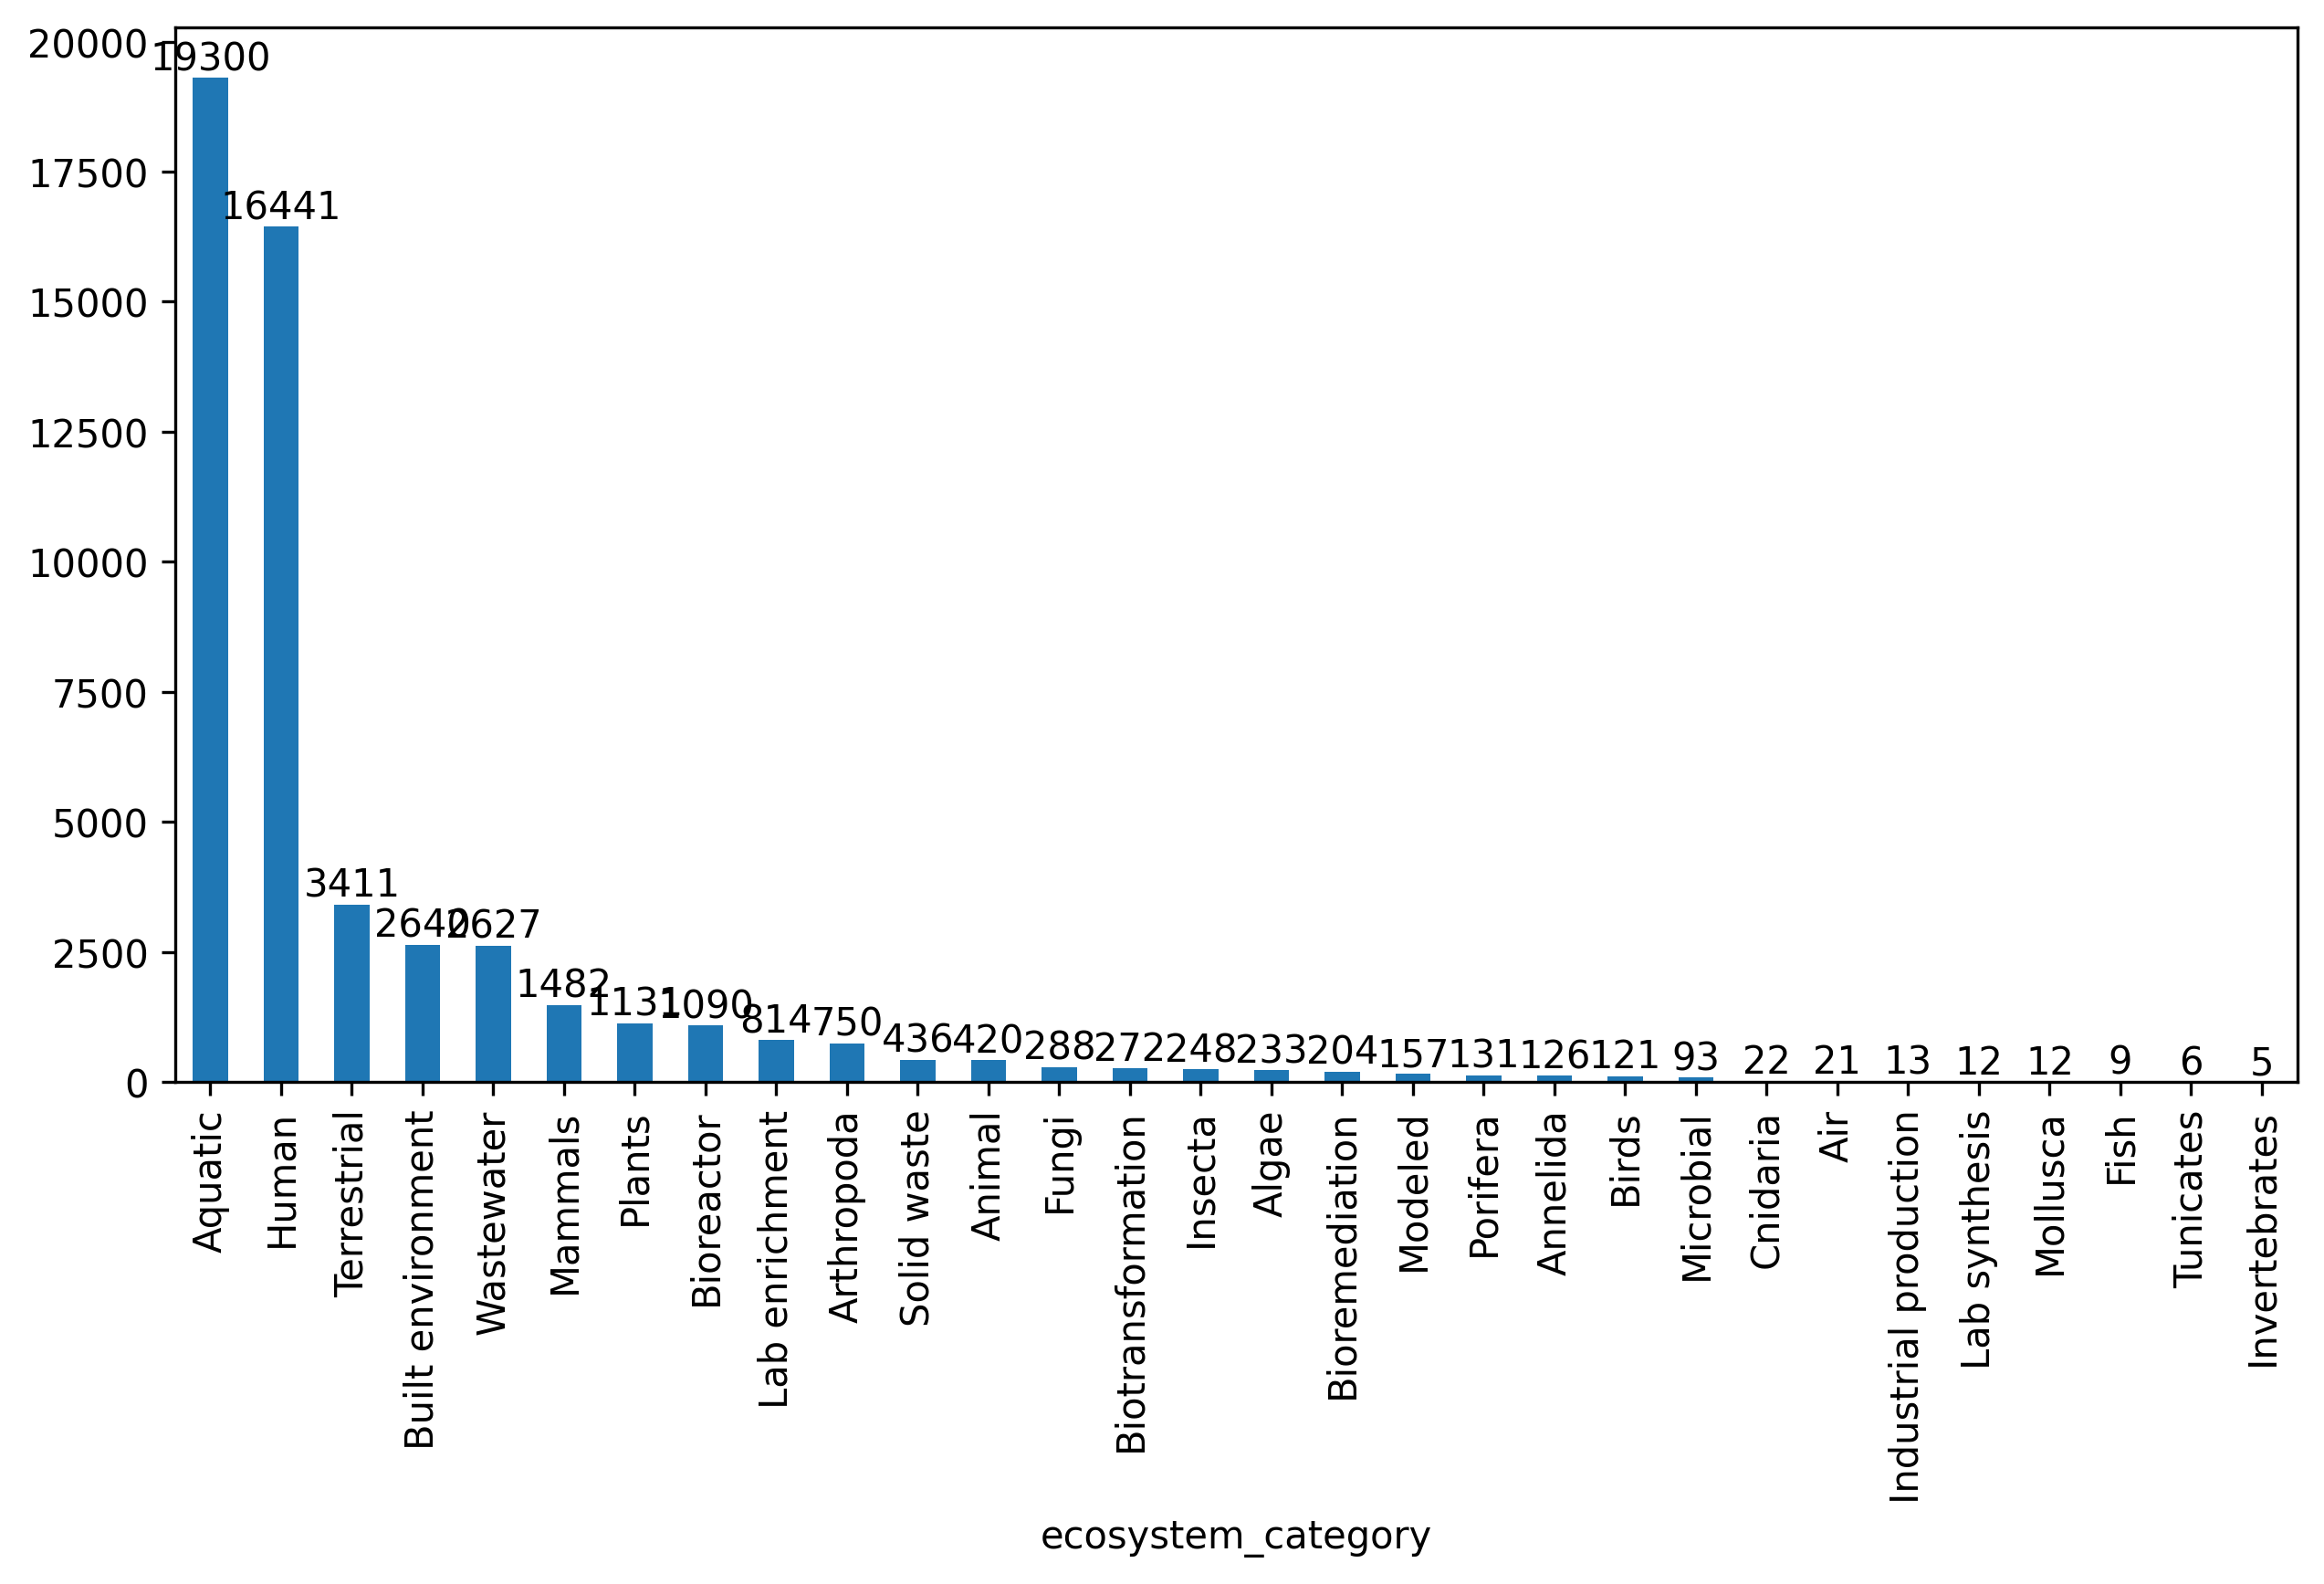

In [4]:
# visualize the distribution of the ecosystem_category
plt.figure(figsize=(10, 5), dpi=300)
ax = df['ecosystem_category'].value_counts().plot(kind='bar')
for i, v in enumerate(df['ecosystem_category'].value_counts()):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

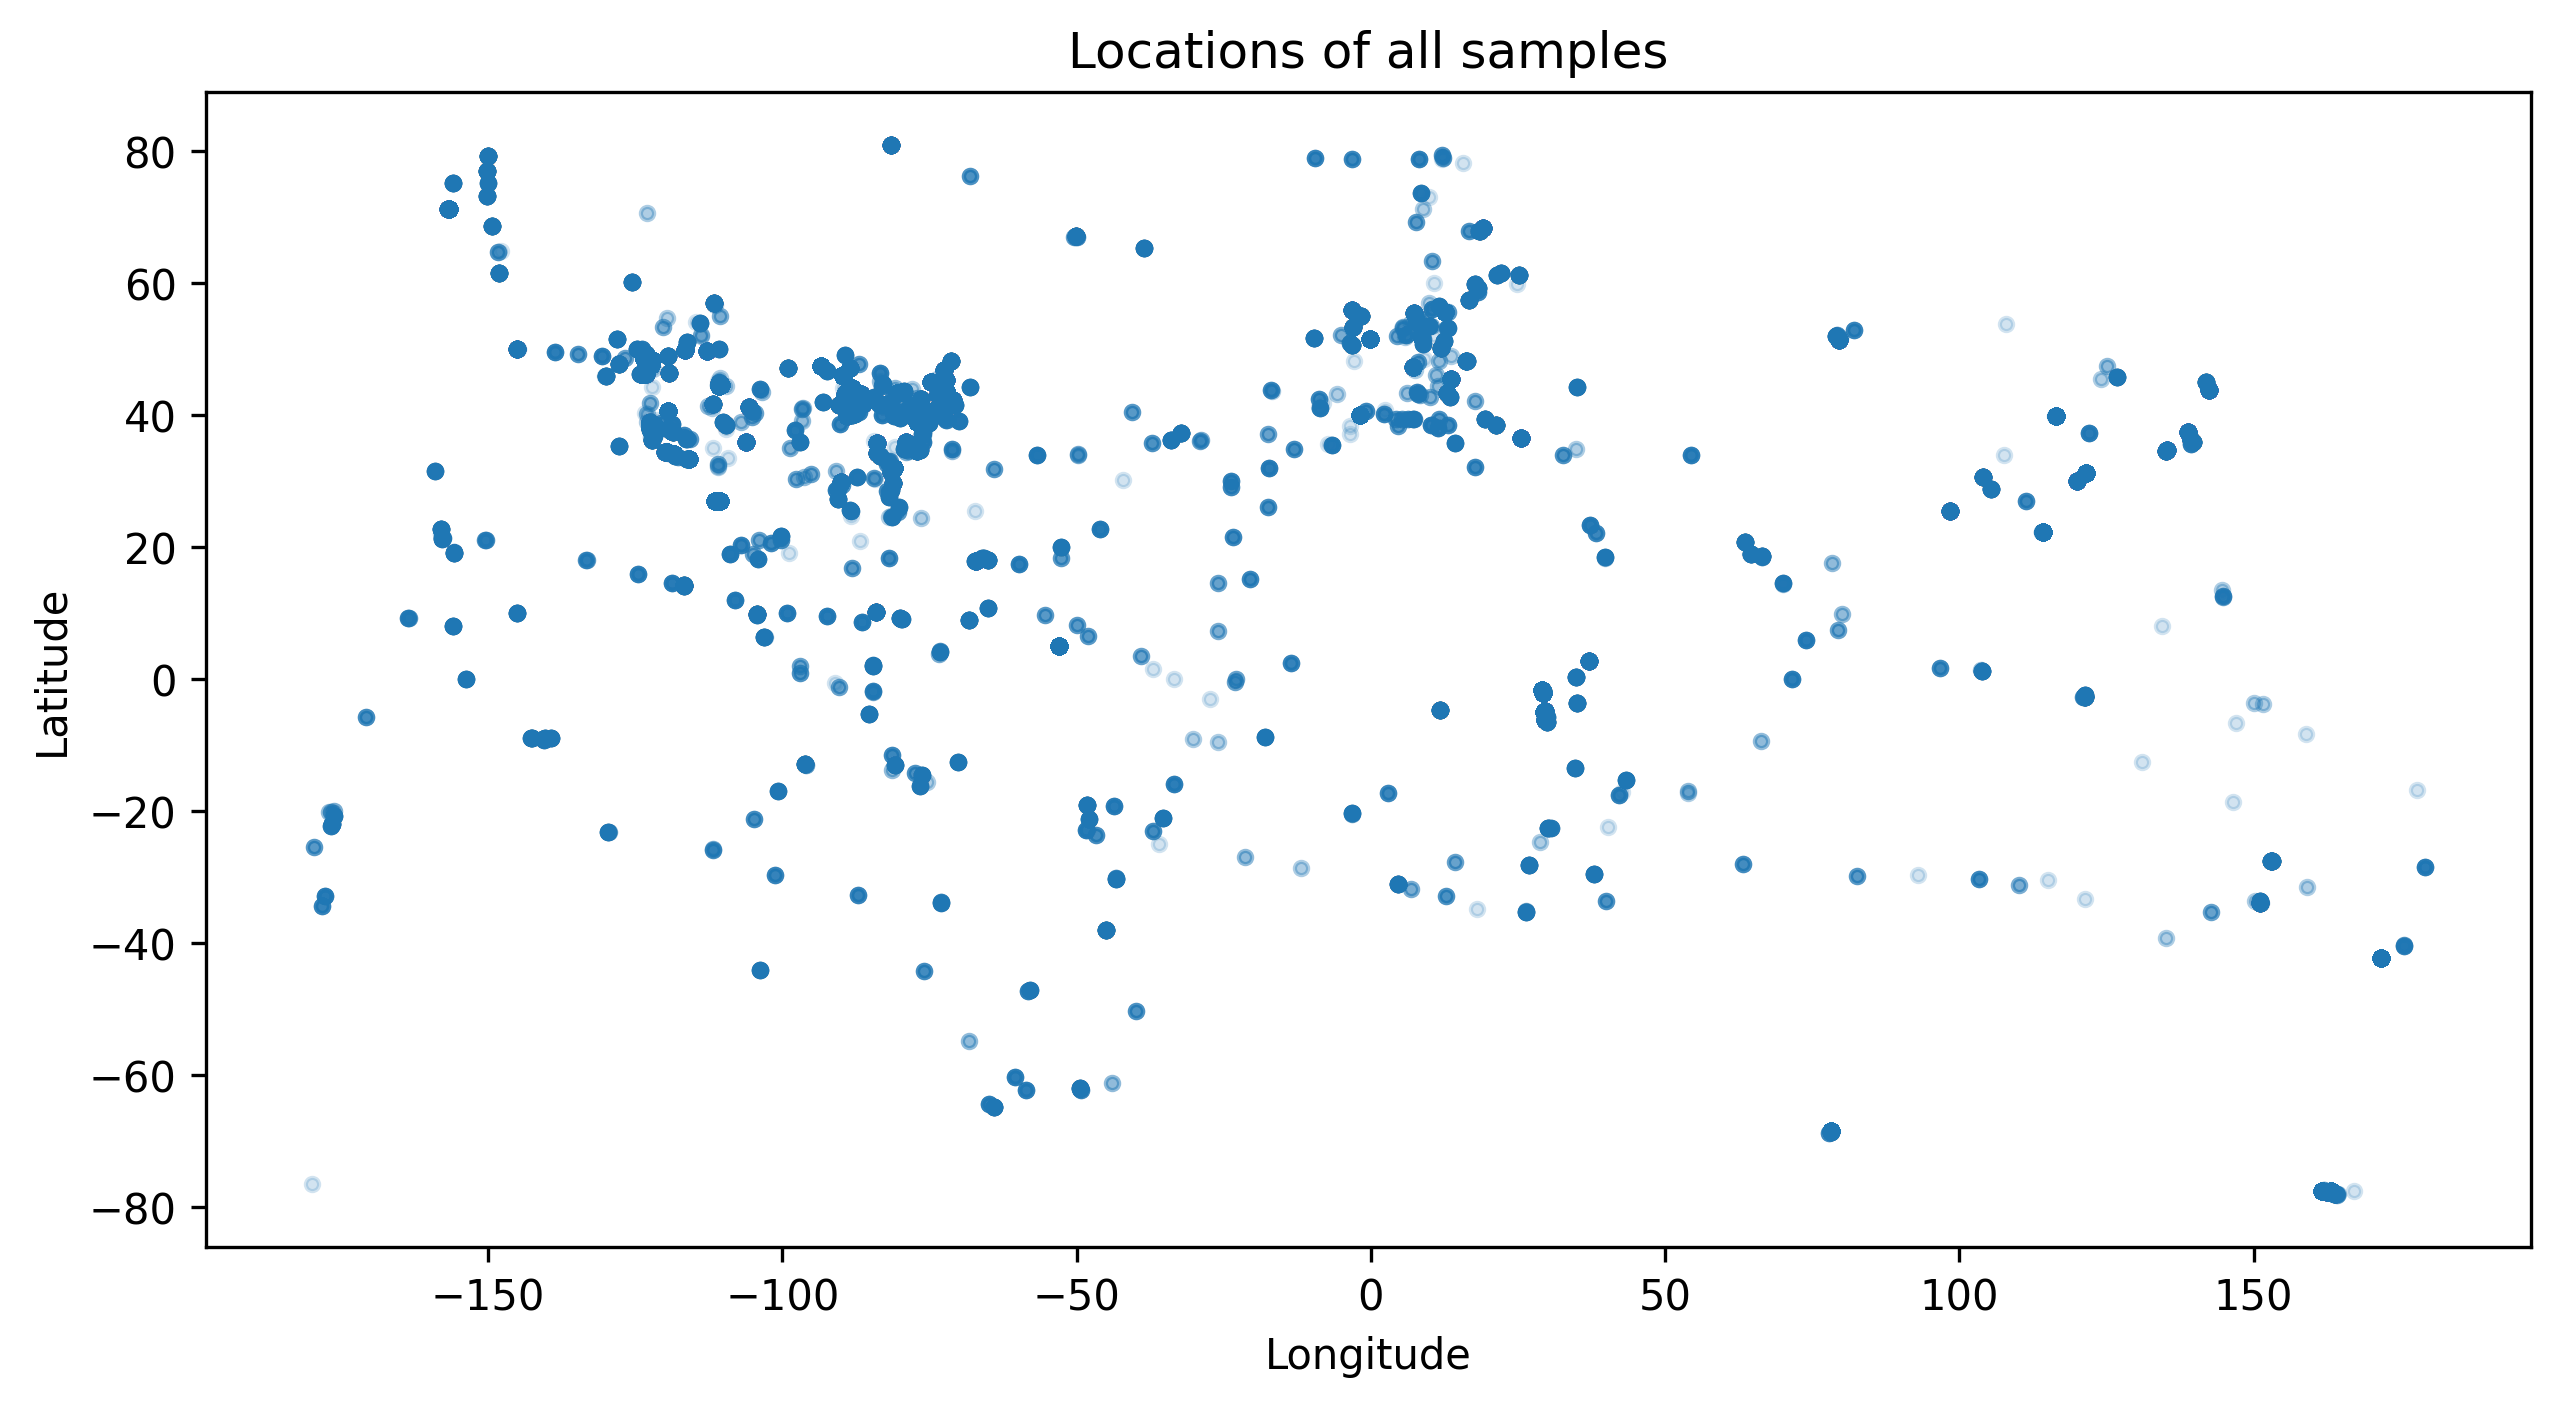

In [5]:
# visualize locations
plt.figure(figsize=(10, 5), dpi=300)
plt.scatter(df['longitude'], df['latitude'], s=10, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of all samples')
plt.show()

### Separate dataframes by categories

In [6]:
human_digestive = df[df['ecosystem_category'] == 'Human']
human_digestive = human_digestive[human_digestive['ecosystem_type'] == 'Digestive system']
all_human_digestive_habitats = np.unique(human_digestive['habitat'].values)
print('Habitats of human digestive system samples:')
for h in all_human_digestive_habitats:
    print('-', h, human_digestive[human_digestive['habitat'] == h].shape[0])

Habitats of human digestive system samples:
- Fossilized dental plaque 10
- Host-associated 1109
- Huma fecal 10
- Human 5743
- Human bile duct 4
- Human colon tissue 8
- Human fecal 4749
- Human feces 2320
- Human gut 54
- Human host-associated 1363
- Human oral 496
- Premature human infant gut 3


In [7]:
aquatic_freshwater = df[df['ecosystem_category'] == 'Aquatic']
aquatic_freshwater = aquatic_freshwater[aquatic_freshwater['ecosystem_type'] == 'Freshwater']
all_aquatic_freshwater_habitats = np.unique(aquatic_freshwater['habitat'].values)
print('Habitats of aquatic freshwater samples:')
for h in all_aquatic_freshwater_habitats:
    print('-', h, aquatic_freshwater[aquatic_freshwater['habitat'] == h].shape[0])

Habitats of aquatic freshwater samples:
- Acid mine drainage 2
- Acid mine drainage  3
- Anoxic lake water 57
- Aquatic 17
- Bog 81
- Bog forest soil 13
- Crenothrix polyspora 1
- Cryconite 46
- Drinking water treatment plant 7
- Environmental 2
- Fountain water 1
- Freshwater 2054
- Freshwater Sediment 218
- Freshwater and marine 1
- Freshwater and sediment 49
- Freshwater lake 564
- Freshwater lake sediment 121
- Freshwater lentic 36
- Freshwater microbial mat 35
- Freshwater sediment 95
- Glacier valley 91
- Groundwater 523
- Lake 15
- Lake sediment 9
- Lentic 29
- Peatland 433
- Polar desert 13
- Polar desert sand 71
- Sediment 18
- Sinkhole freshwater 2
- Surface water 2
- Wastewater 12
- Well water 2
- Wetland 2
- Wetland sediment 21
- freshwater 1424
- freshwater lake 645
- freshwater lake hypolimnion 36
- freshwater microbial mat 235
- groundwater 128
- sediment 159
- watersheds 62


In [8]:
# filter again by habitat
fecal = human_digestive[(human_digestive['habitat'] == 'Human feces') | (human_digestive['habitat'] == 'Human fecal')]
groundwater = aquatic_freshwater[aquatic_freshwater['habitat'] == 'Groundwater']

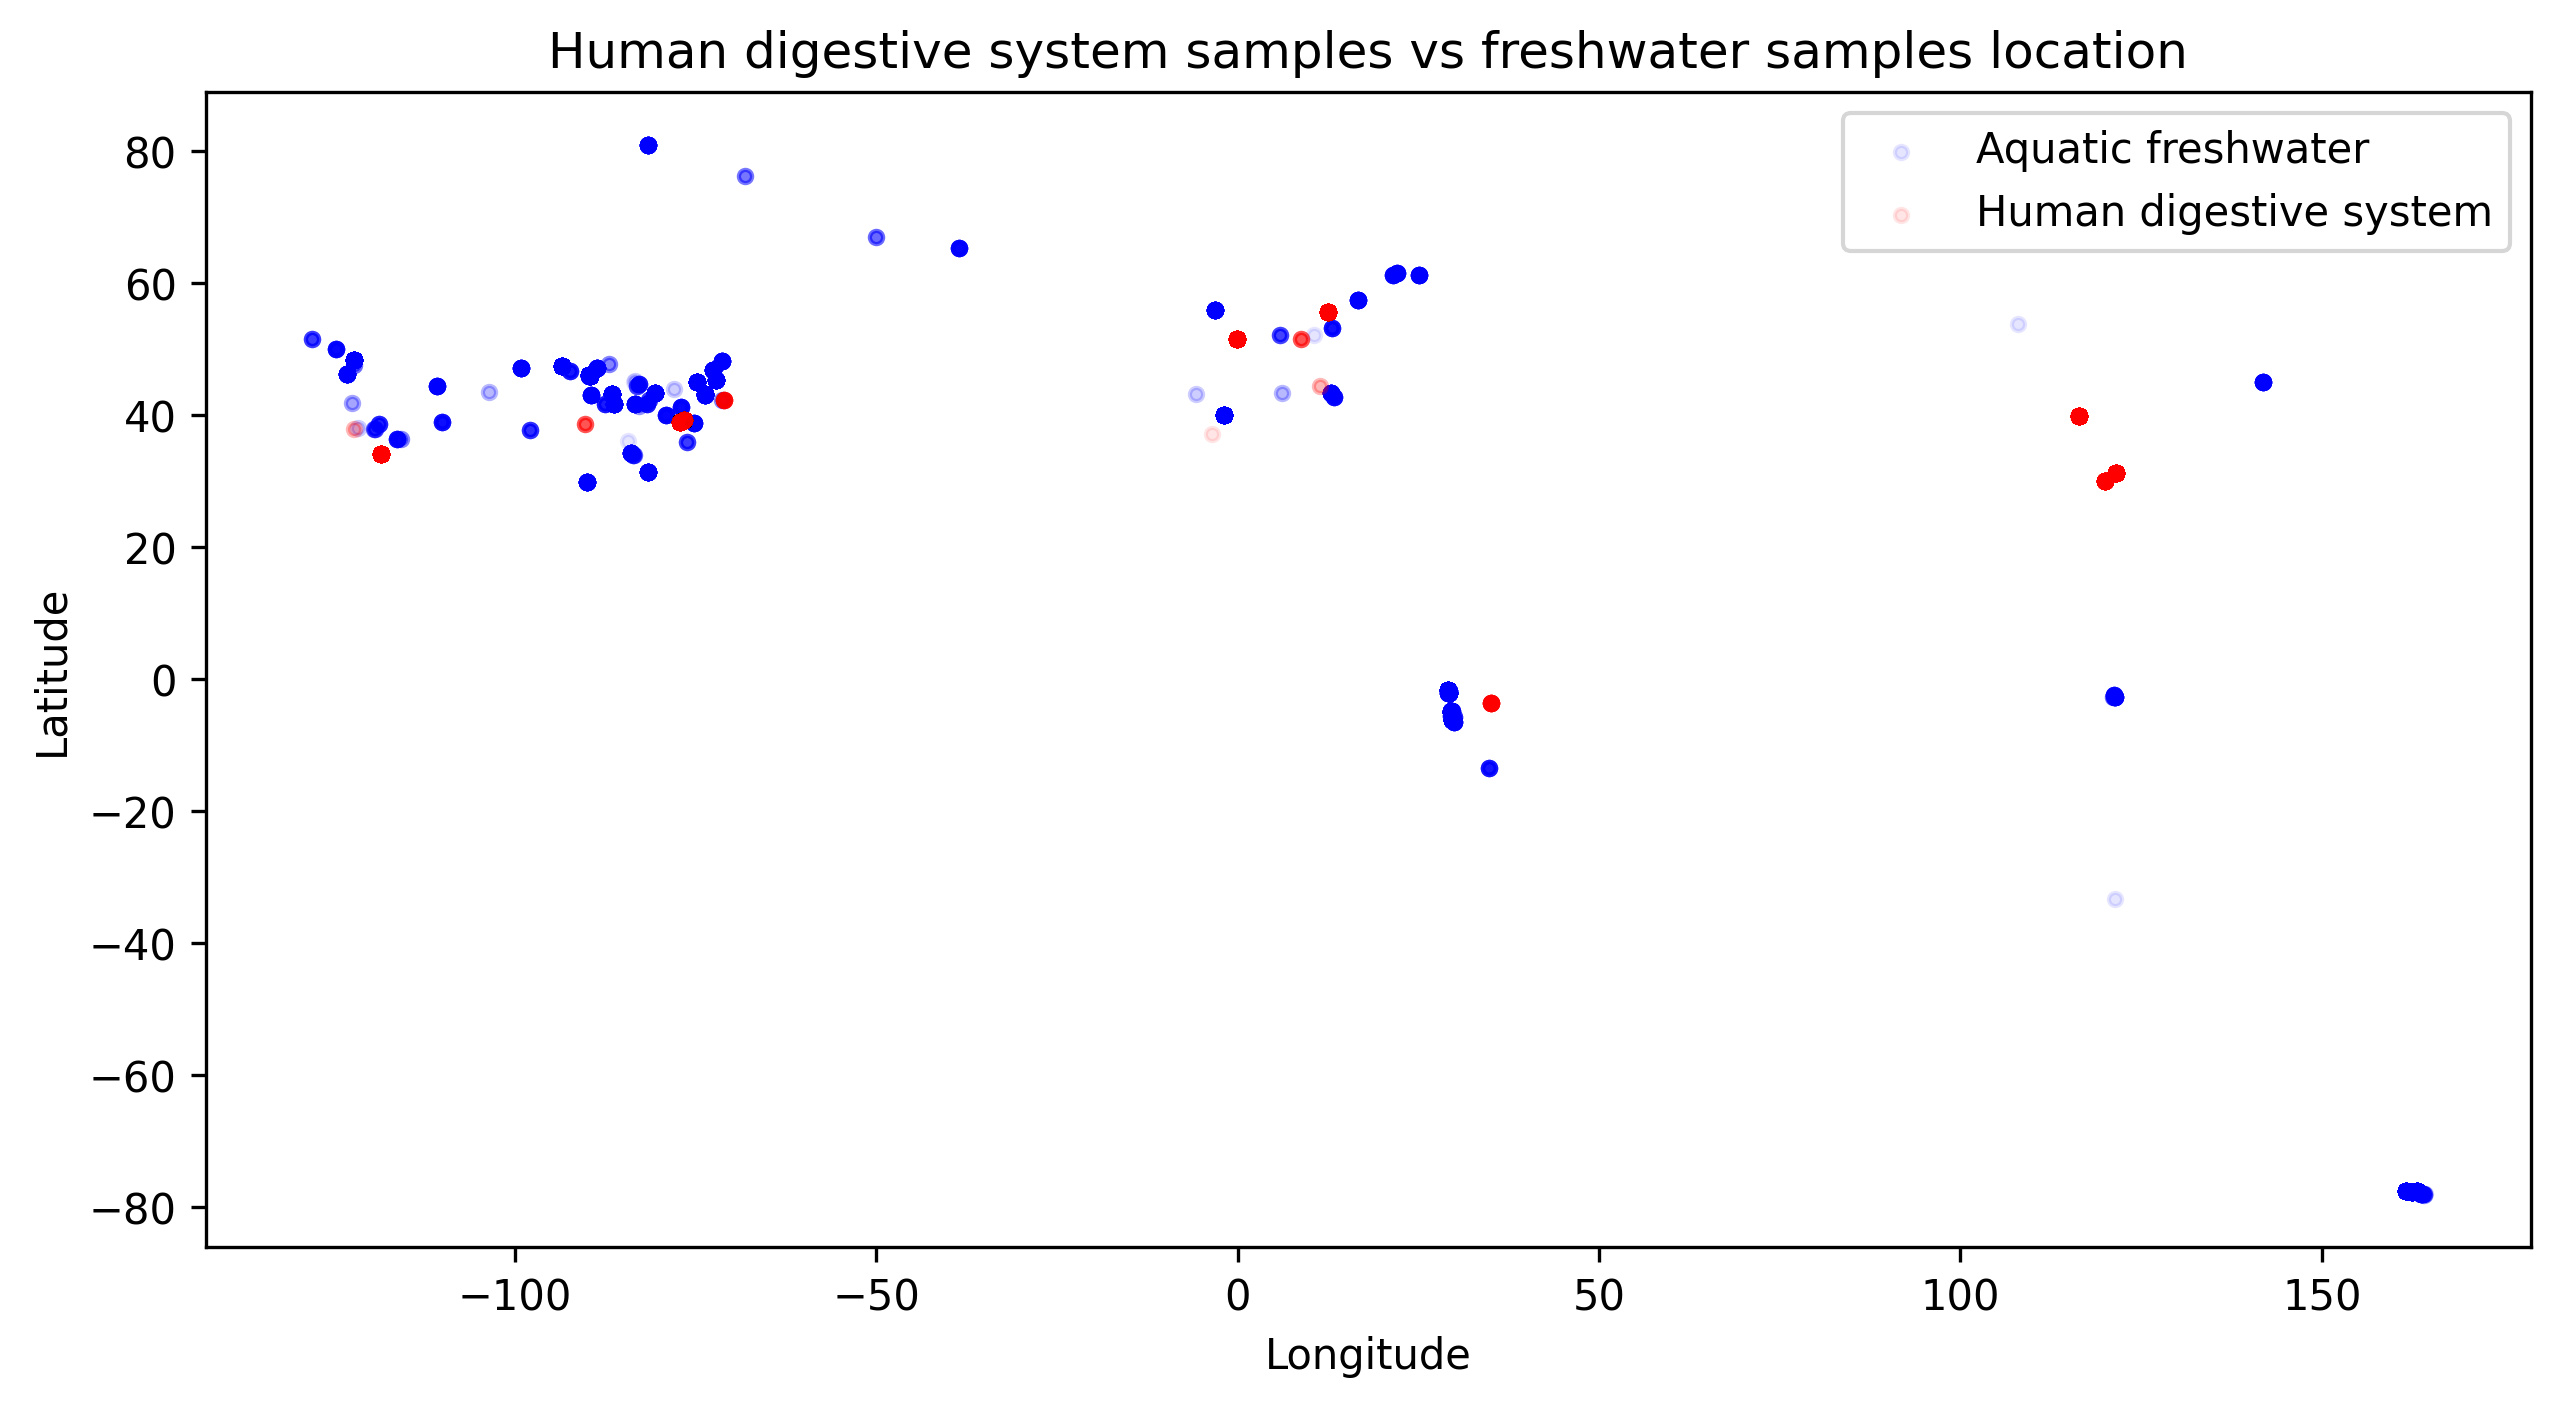

In [9]:
# visualize locations
plt.figure(figsize=(10, 5), dpi=300)
plt.scatter(aquatic_freshwater['longitude'], aquatic_freshwater['latitude'], s=10, c='b', alpha=0.1, label='Aquatic freshwater')
plt.scatter(human_digestive['longitude'], human_digestive['latitude'], s=10, c='r', alpha=0.1, label='Human digestive system')
# plt.scatter(groundwater['longitude'], groundwater['latitude'], s=10, c='b', alpha=0.1, label='Groundwater')
# plt.scatter(fecal['longitude'], fecal['latitude'], s=10, c='r', alpha=0.1, label='Fecal')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Human digestive system samples vs freshwater samples location')
plt.show()

In [10]:
# read markers excel
# %pip install openpyxl
markers_df = pd.read_excel('41587_2020_718_MOESM3_ESM.xlsx')
markers_df

,marker_id,% genomes where gene present,% genomes where gene multi-copied,% genomes where gene present and single-copied,bit-score cutoff
0,BA00001,0.920860,0.005851,0.915471,136.1
1,BA00002,0.882598,0.004420,0.878697,72.8
2,BA00003,0.854964,0.003752,0.851756,167.8
3,BA00007,0.881476,0.004743,0.877295,50.0
4,BA00008,0.862423,0.003413,0.859480,308.2
5,BA00009,0.874718,0.004326,0.870934,112.6
6,BA00010,0.884155,0.004474,0.880199,176.0
7,BA00011,0.904820,0.003348,0.901791,115.1
8,BA00012,0.879880,0.004018,0.876345,120.2
9,BA00014,0.879639,0.003612,0.876462,117.5


In [11]:
# save to csv
markers_df.to_csv('marker_ids.csv', index=False)